In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix


In [7]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["house_pricing"]
collection = db["data"]


In [9]:
df = pd.read_csv("./realtor.csv")
data_dictionary = df.to_dict(orient='records')
collection.insert_many(data_dictionary)

InsertManyResult([ObjectId('663283009ce61bbc34f0f244'), ObjectId('663283009ce61bbc34f0f245'), ObjectId('663283009ce61bbc34f0f246'), ObjectId('663283009ce61bbc34f0f247'), ObjectId('663283009ce61bbc34f0f248'), ObjectId('663283009ce61bbc34f0f249'), ObjectId('663283009ce61bbc34f0f24a'), ObjectId('663283009ce61bbc34f0f24b'), ObjectId('663283009ce61bbc34f0f24c'), ObjectId('663283009ce61bbc34f0f24d'), ObjectId('663283009ce61bbc34f0f24e'), ObjectId('663283009ce61bbc34f0f24f'), ObjectId('663283009ce61bbc34f0f250'), ObjectId('663283009ce61bbc34f0f251'), ObjectId('663283009ce61bbc34f0f252'), ObjectId('663283009ce61bbc34f0f253'), ObjectId('663283009ce61bbc34f0f254'), ObjectId('663283009ce61bbc34f0f255'), ObjectId('663283009ce61bbc34f0f256'), ObjectId('663283009ce61bbc34f0f257'), ObjectId('663283009ce61bbc34f0f258'), ObjectId('663283009ce61bbc34f0f259'), ObjectId('663283009ce61bbc34f0f25a'), ObjectId('663283009ce61bbc34f0f25b'), ObjectId('663283009ce61bbc34f0f25c'), ObjectId('663283009ce61bbc34f0f2

In [11]:
# Fetch data from MongoDB
data_from_mongo = list(collection.find())
data = pd.DataFrame(data_from_mongo)

In [12]:
data.columns

Index(['_id', 'brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot',
       'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [13]:
# 1. Check DataFrame structure
print("DataFrame structure:")
print(data.head())
# Preprocessing
# Drop unnecessary columns
# Update the column names in the drop method to match the columns in your DataFrame
data.drop(['_id', 'street', 'city', 'state', 'prev_sold_date'], axis=1, inplace=True)

# Handle categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['status'])

# Handling missing values
data.fillna(data.mean(), inplace=True)

# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']


DataFrame structure:
                        _id  brokered_by    status     price  bed  bath  \
0  663283009ce61bbc34f0f244     103378.0  for_sale  105000.0  3.0   2.0   
1  663283009ce61bbc34f0f245      52707.0  for_sale   80000.0  4.0   2.0   
2  663283009ce61bbc34f0f246     103379.0  for_sale   67000.0  2.0   1.0   
3  663283009ce61bbc34f0f247      31239.0  for_sale  145000.0  4.0   2.0   
4  663283009ce61bbc34f0f248      34632.0  for_sale   65000.0  6.0   2.0   

   acre_lot     street        city        state  zip_code  house_size  \
0      0.12  1962661.0    Adjuntas  Puerto Rico     601.0       920.0   
1      0.08  1902874.0    Adjuntas  Puerto Rico     601.0      1527.0   
2      0.15  1404990.0  Juana Diaz  Puerto Rico     795.0       748.0   
3      0.10  1947675.0       Ponce  Puerto Rico     731.0      1800.0   
4      0.05   331151.0    Mayaguez  Puerto Rico     680.0         NaN   

  prev_sold_date  
0            NaN  
1            NaN  
2            NaN  
3            

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [16]:
# Logistic Regression (Example: binary classification)
# Define price categories (you can adjust these based on your dataset)
price_threshold = np.median(y)
y_train_logistic = (y_train > price_threshold).astype(int)
y_test_logistic = (y_test > price_threshold).astype(int)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test)

C:\Users\rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)


In [18]:
# Evaluation for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)

Linear Regression:
Mean Squared Error (MSE): 2613659091634.7417
Root Mean Squared Error (RMSE): 1616681.5059357677
Mean Absolute Error (MAE): 643195.6810730627


In [19]:
# Evaluation for Logistic Regression
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
confusion_mat_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_mat_logistic)



Logistic Regression:
Accuracy: 0.6476
Confusion Matrix:
 [[6484 3628]
 [3420 6468]]


In [20]:
# Evaluation for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)


Random Forest Regression:
Mean Squared Error (MSE): 1177894349665.0378
Root Mean Squared Error (RMSE): 1085308.4122336092
Mean Absolute Error (MAE): 294750.39546331234


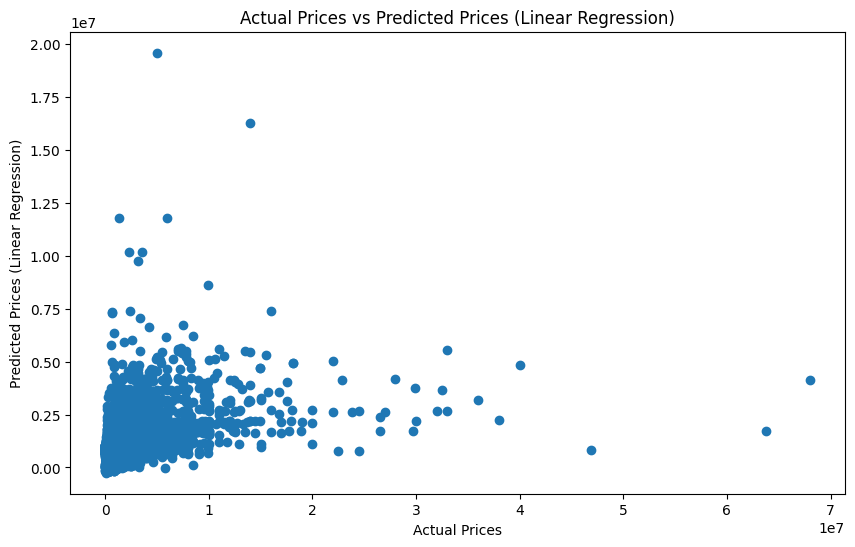

In [21]:
# Plotting predictions vs actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Linear Regression)")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()

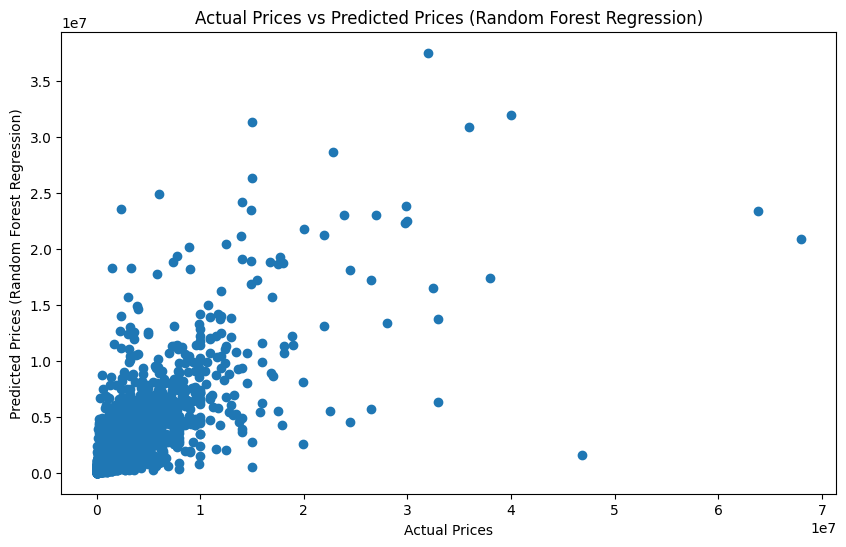

In [22]:
# Plotting predictions vs actual values for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest Regression)")
plt.title("Actual Prices vs Predicted Prices (Random Forest Regression)")
plt.show()


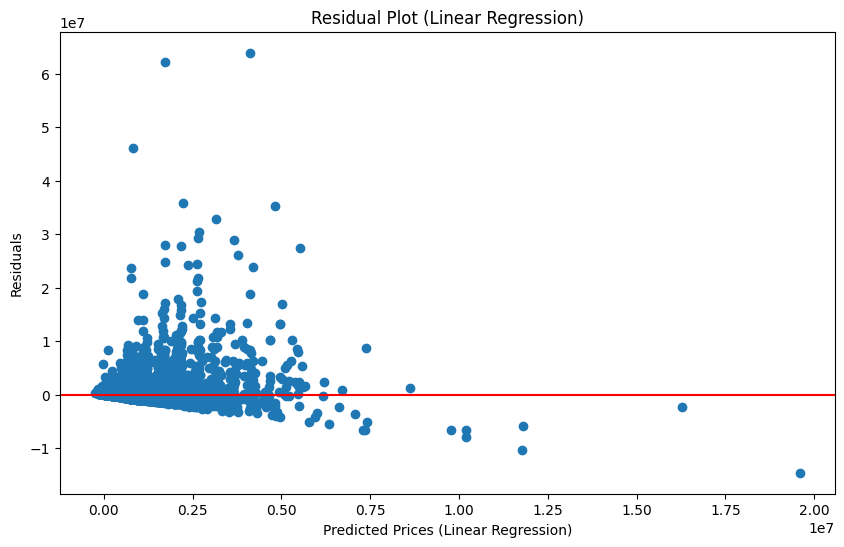

In [23]:
# Residual Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, y_test - y_pred_linear)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Prices (Linear Regression)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

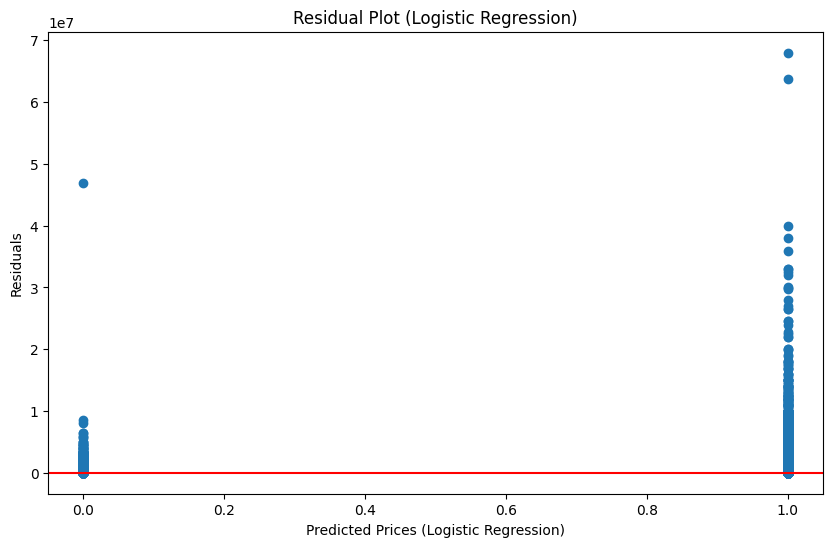

In [24]:
# Residual Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_logistic, y_test - y_pred_logistic)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Prices (Logistic Regression)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Logistic Regression)")
plt.show()

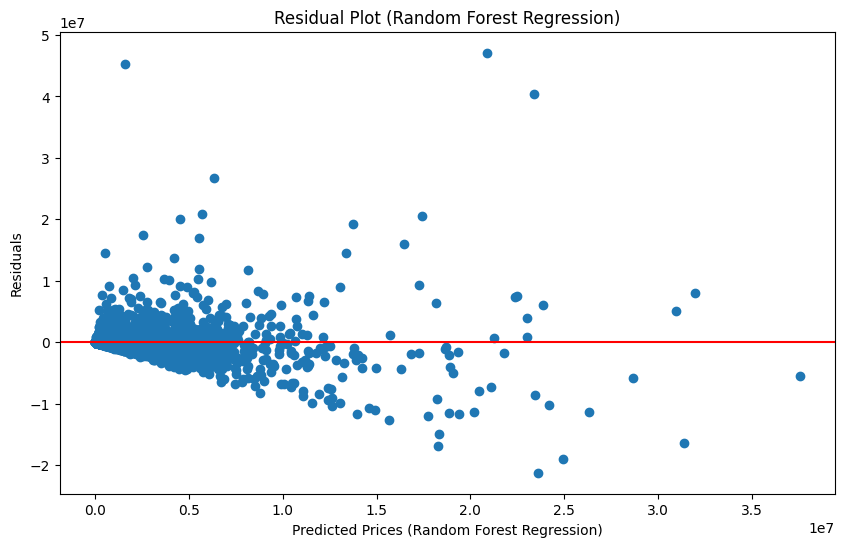

In [25]:
# Residual Plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test - y_pred_rf)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Prices (Random Forest Regression)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest Regression)")
plt.show()

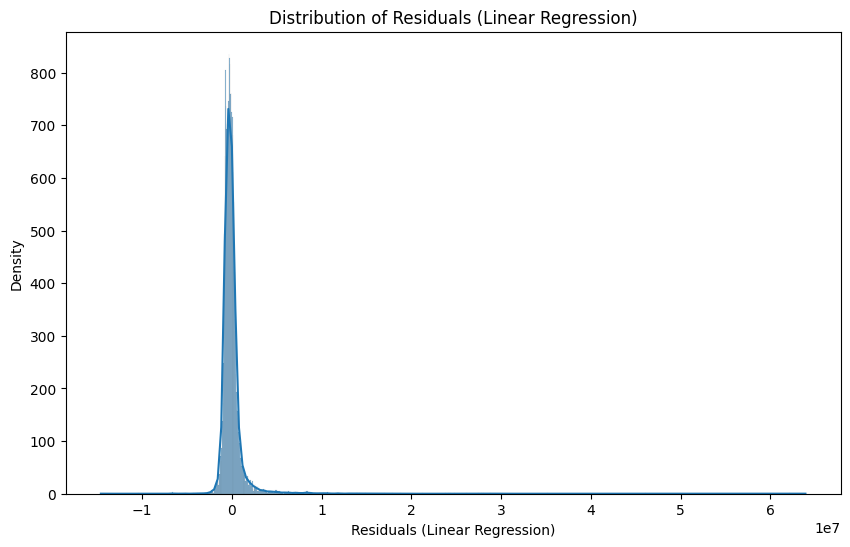

In [26]:
# Distribution of Residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_linear, kde=True)
plt.xlabel("Residuals (Linear Regression)")
plt.ylabel("Density")
plt.title("Distribution of Residuals (Linear Regression)")
plt.show()

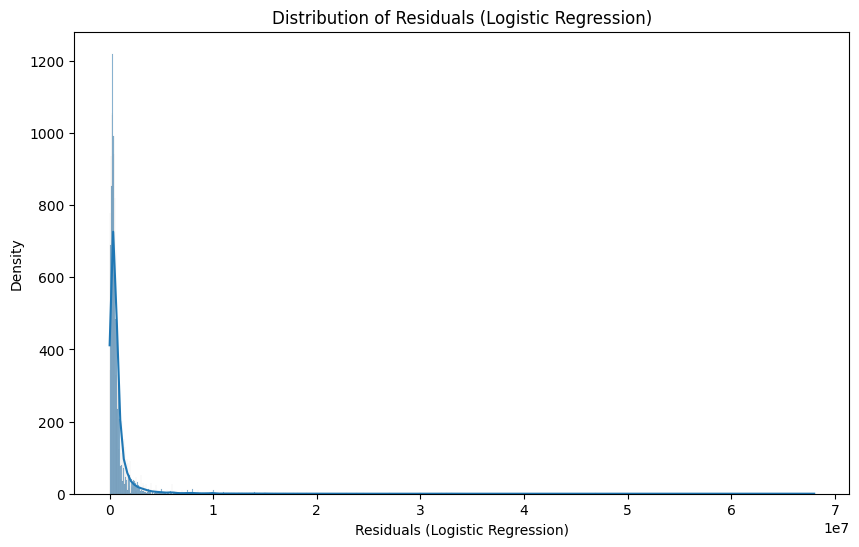

In [27]:
# Distribution of Residuals for Logistic Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_logistic, kde=True)
plt.xlabel("Residuals (Logistic Regression)")
plt.ylabel("Density")
plt.title("Distribution of Residuals (Logistic Regression)")
plt.show()

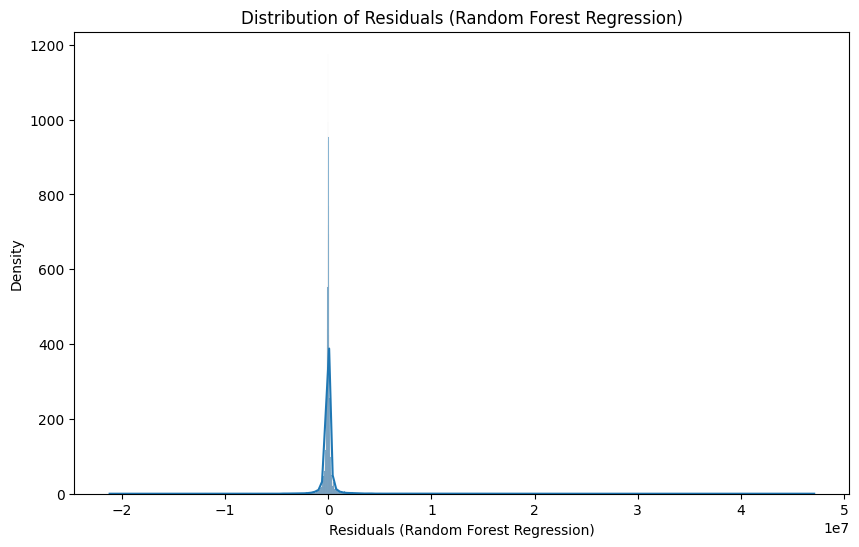

In [28]:
# Distribution of Residuals for Random Forest Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_rf, kde=True)
plt.xlabel("Residuals (Random Forest Regression)")
plt.ylabel("Density")
plt.title("Distribution of Residuals (Random Forest Regression)")
plt.show()

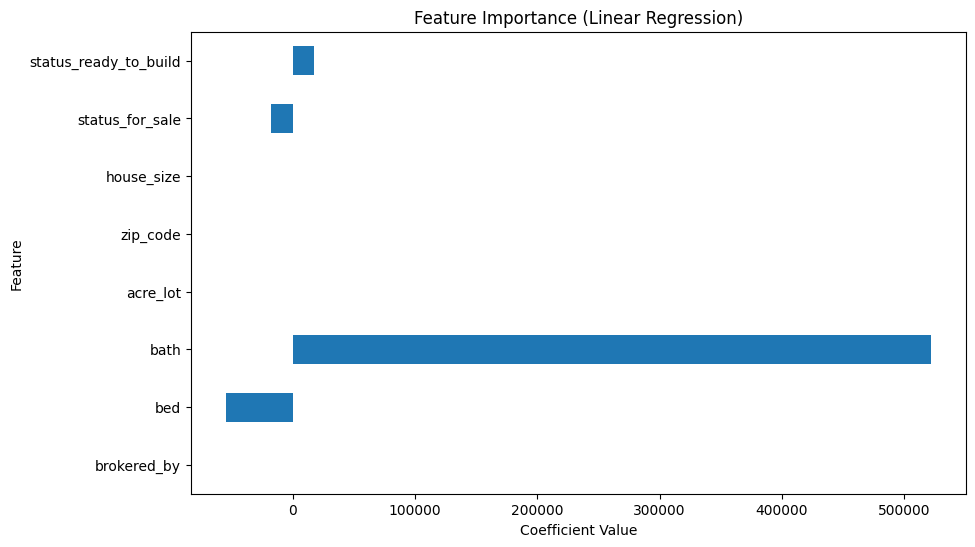

In [29]:
# Feature Importance (Coefficients) for Linear Regression
coefficients_linear = pd.Series(linear_model.coef_, index=X.columns)
coefficients_linear.plot(kind='barh', figsize=(10, 6))
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression)")
plt.show()


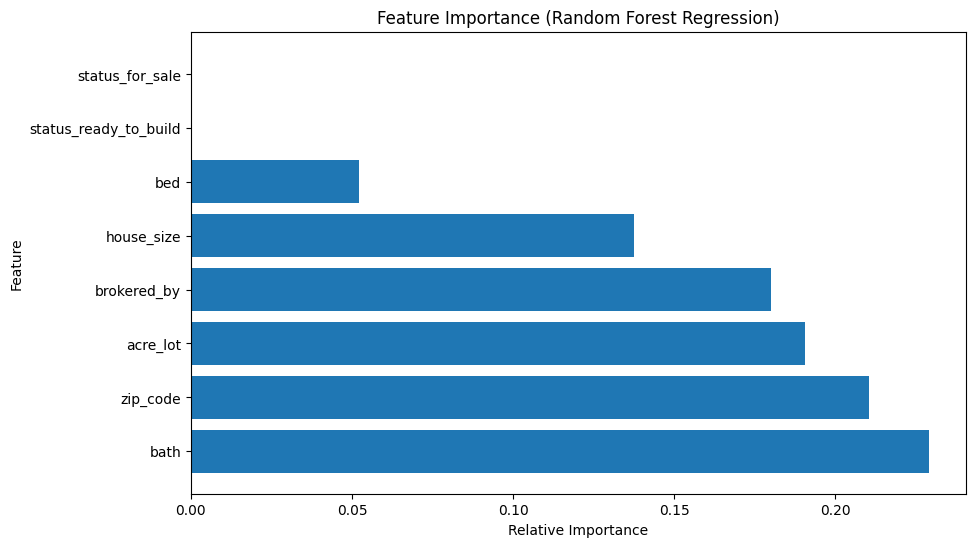

In [30]:
# No coefficients for Logistic Regression as it's not interpretable in the same way

# Feature Importance for Random Forest Regression
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest Regression)")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

In [31]:
# Compare performance metrics
performance_metrics = {
    "Linear Regression": {"MSE": mse_linear, "RMSE": rmse_linear, "MAE": mae_linear},
    "Logistic Regression": {"Accuracy": accuracy_logistic},
    "Random Forest Regression": {"MSE": mse_rf, "RMSE": rmse_rf, "MAE": mae_rf}
}

In [32]:
# Find the model with the minimum value of RMSE and MSE
best_model = min(performance_metrics, key=lambda x: performance_metrics[x].get("RMSE", np.inf))
print("\nBest Performing Model (based on RMSE):", best_model)



Best Performing Model (based on RMSE): Random Forest Regression


In [33]:
# Find the model with the minimum value of MSE
best_model_mse = min(performance_metrics, key=lambda x: performance_metrics[x].get("MSE", np.inf))
print("\nBest Performing Model (based on MSE):", best_model_mse)


Best Performing Model (based on MSE): Random Forest Regression


In [34]:
# Find the model with the minimum value of MAE
best_model_mae = min(performance_metrics, key=lambda x: performance_metrics[x].get("MAE", np.inf))
print("\nBest Performing Model (based on MAE):", best_model_mae)



Best Performing Model (based on MAE): Random Forest Regression


In [35]:
# Find the model with the maximum value of Accuracy
best_model_accuracy = max(performance_metrics, key=lambda x: performance_metrics[x].get("Accuracy", 0))
print("\nBest Performing Model (based on Accuracy):", best_model_accuracy)


Best Performing Model (based on Accuracy): Logistic Regression
